**Imports**

In [1]:
import pandas as pd
import numpy as np
import pydataset
import pyplotterlib.standard.plotters as ppl

**1) Get Data Sorted**

In [2]:
def _getFractMonth(inpDateTime):
    return inpDateTime.month + (inpDateTime.day / inpDateTime.days_in_month)

def _fahrenheitToCelsius(inpTemp):
    return (inpTemp-32)*(5/9)

DF = pydataset.data("airquality")
DF["year"] = 1973
DF.rename(columns={"Month":"month", "Day":"day"}, inplace=True)
DF["dateTimes"] = pd.to_datetime({"month":DF["month"], "year":DF["year"], "day":DF["day"]})
DF["fractMonths"] = DF["dateTimes"].apply(_getFractMonth)
DF["SolarRolling"] = DF.rolling(window=3)["Solar.R"].mean()

DF["TempCelsius"] = DF["Temp"].apply(_fahrenheitToCelsius)


**2) Create individual plotters for Solar Radiation and temperature**

In [3]:
#Template
currKwargs = {"lineMarkerStyles":["x"],"xLabelStr":"Month (in 1973)"}
_templPlotter = ppl.LinePlotter(**currKwargs)

#Solar radiation - Want to use red to highlight this
_solarData = DF[["fractMonths","SolarRolling"]].to_numpy()
currKwargs = {"axisColorY":'r', "axisColorY_exclSpines":True,
              "lineColors":['r'], "plotData":[_solarData], "yLabelStr":"Solar Radiation (Rolling Moving Average, Ly)"}
_solarPlotter = _templPlotter.createFactory(**currKwargs)

#Temperature - Want to use green to highlight this
_tempData = DF[["fractMonths","Temp"]].to_numpy()
currKwargs = {"axisColorY":'g',"axisColorY_exclSpines":True,
              "lineColors":['g'], "plotData":[_tempData], "yLabelStr":"Temperature (Fahrenheit)"}
_tempPlotter = _templPlotter.createFactory(**currKwargs)


**3) Combine solar radiation/temperature into one plotter (double y-axis)**

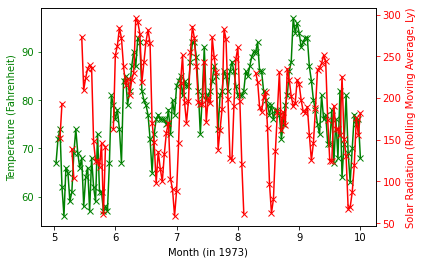

In [4]:
sharedPlotter = ppl.DoubleAxisPlotter(independentYAxis=True, plotters=[_tempPlotter,_solarPlotter])
currOutput = sharedPlotter.createPlot()

**4) Separately, make a temperature VS solar radiation, and use two temperature units (double x-axis)**

In [5]:
_tempDataFahrenheit = DF[["Temp", "SolarRolling"]].to_numpy()
_tempDataCelsius = DF[["TempCelsius", "SolarRolling"]].to_numpy()


#Need to set equivalent x-limits for both
_fahXLim = [50,100]
_celXLim = [_fahrenheitToCelsius(x) for x in _fahXLim]

#
currKwargs = {"lineColors":['g'],
              "lineStyles":["None"],
              "xLabelStr":"Temperature (Celsius)",
              "xLimit":_celXLim}
celsiusPlotter = _templPlotter.createFactory(**currKwargs)


#
currKwargs = {"lineStyles":["None"],
              "lineColors":['r'],
              "plotData":[_tempDataFahrenheit],
              "xLabelStr":"Temperature (Fahrenheit)",
              "xLimit":_fahXLim,
              "yLabelStr":"Solar Radiation (Rolling Moving Average, Ly)"
             }
fahrenheitPlotter = _templPlotter.createFactory(**currKwargs)


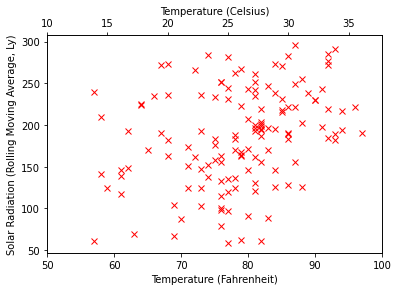

In [6]:
celFahPlotter = ppl.DoubleAxisPlotter(independentXAxis=True, plotters=[fahrenheitPlotter,celsiusPlotter])
currOutput = celFahPlotter.createPlot()